# Practica 6

Carlos Saiz Hernández

## **Imports**

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


### **Funciones Extras**

In [2]:
def nodosColorWikipedia():
    """*+
    Implementamos el color al grafo

    Returns:
        List: Lista de colores para los nodos del grafo.
    """
    colores=[]
    for x in range(1, 11):
        if x<5:
            color = 'red'
        elif x<8 and x > 4:
            color = 'green'
        else:
            color = 'blue'
        colores.append(color)
    return colores

def imprimirGrafo(G, colores, titulo: str = ''):
    """*+
    Imprime el grafo G.

    Args:
        G (nx.Graph): Grafo a imprimir
        colores (List): Lista de colores para los nodos del grafo.
        titulo (str): Título del grafo.
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=colores, with_labels=True)
    plt.title(titulo)
    plt.show()
    
def coloresKarate (particiones):
    """*+
    Asigna un color a cada nodo de acuerdo a la partición a la que pertenece.

    Args:
        particiones (List): Lista de particiones.

    Returns:
        Dict: Diccionario con los colores de los nodos.
    """
    colores={}
    for i, comunidad in enumerate(particiones):
        for nodo in comunidad:
            colores[nodo] = i
            
    return list(colores.values())

def imprimirGrafico(diccionario: dict):
    """*+
    Imprime un gráfico de barras con los valores del diccionario.

    Args:
        diccionario (dict): Diccionario con los valores a graficar.
    """
    key = list(dicionario.keys())
    values = list(dicionario.values())
    
    plt.figure(figsize=(10, 6)) #tamano del grafico
    plt.bar(key, values, width=0.8) #grafico de barras
    
    max_abs_y = max(abs(max(values)), abs(min(values)))
    plt.ylim(-max_abs_y * 0.3, max_abs_y * 1.1)  # Ajusta el factor 1.1 según tus necesidades

    plt.xlabel('N comunidades')
    plt.ylabel('Modularidad')
    plt.title('Gráfico de barras:  modularidad vs el número de particiones')
        
    plt.xticks(key)
    
    plt.show()

## **Modilaridad**

### 1.1 Implementar la modularidad

In [3]:
def calcularModularidad(G, particion):
    """*+
    Calcula la modularidad de una partición de un grafo.

    Args:
        G (grafo): Grafo sobre el que se calculará la modularidad.
        particion (List): Etiquetas de los nodos del grafo.

    Returns:
        numpy.float64:  La modularidad de la partición.
    """
    m = G.number_of_edges() # Nº de enlaces
    nodos = list(G.nodes())
    sumatorio = 0
    matriz_adyacencia = nx.adjacency_matrix(G).todense()

    for nodoi in nodos:
        for nodoj in nodos:
            # numero de enlaces entre i y j
            A = matriz_adyacencia[nodoi-1, nodoj-1]
    
            # Grado de los nodos i y j
            ki = G.degree(nodoi)
            kj = G.degree(nodoj)
    
            # Si pertenecen a la misma comunidad 1, en caso contrario 0.
            if particion[nodoi] == particion[nodoj]:
              sumatorio += A - ((ki * kj) / (2 * m)) # suma si pertenece a la communidad

    return sumatorio / (2 * m)


In [4]:
# Crear el grafo del ejemplo de Wikipedia
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (4,6), (5,6), (5,7), (6,7), (4,8), (8,9), (8,10), (9,10)])
imprimirGrafo(G, nodosColorWikipedia(), 'Grafo Wikipedia')
particionWiquipedia = {
    1: 'rojo', 2: 'rojo', 3: 'rojo', 4:'rojo',
    5: 'verde', 6: 'verde', 7: 'verde',
    8: 'azul', 9: 'azul', 10: 'azul'
}

# Calcular la modularidad
modularidad = calcularModularidad(G, particionWiquipedia)
print(f"Modularidad: {modularidad}")

TypeError: object of type 'int' has no len()

### 1.2 Ejemplo de Clase

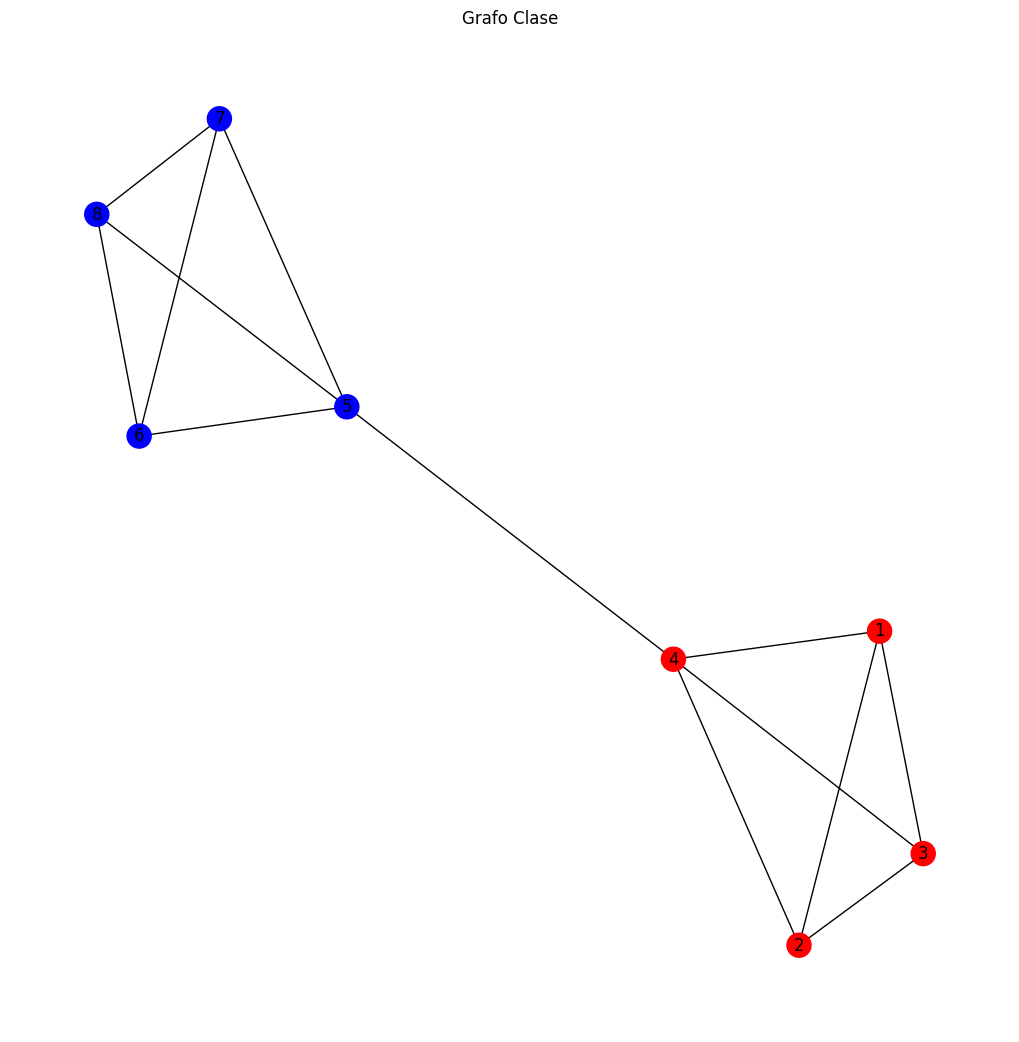

In [ ]:
# Grafo espuesto en clase
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,3), (2,4), (3,4), (4,5), (5,6), (5,7), (5,8), (6,7), (6,8), (7,8)])
colores_clase= {1: 'red', 2: 'red', 3: 'red', 4: 'red', 5: 'blue', 6: 'blue', 7: 'blue', 8: 'blue'}
imprimirGrafo(G, list(colores_clase.values()), 'Grafo Clase')

#### A) Partición correspondiente a toda la red

In [ ]:
particion = {1: 'rojo', 2: 'rojo', 3: 'rojo', 4: 'rojo', 5: 'rojo', 6: 'rojo', 7: 'rojo', 8: 'rojo'}

modularidad_toda_la_red = calcularModularidad(G, particion)
print(f"Modularidad para toda la red: {modularidad_toda_la_red: .4f}")

Modularidad para toda la red: -0.0000


#### B) Una partición para cada nodo

In [ ]:
particion = {1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8'}

modularidad = calcularModularidad(G, particion)

print(f'modularidad para una particion correspondiente a cada nodo: {modularidad: .4f}')

modularidad para una particion correspondiente a cada nodo: -0.1272


#### C) Para la partición de colores

In [ ]:
modularidad = calcularModularidad(G, colores_clase)

print(f'modularidad para una particion correspondiente a cada nodo: {modularidad: .4f}')

modularidad para una particion correspondiente a cada nodo:  0.4231


## **Detección de comunidades basada en la eliminación de enlaces**

### 2.1 Algoritmo de Girvan-Newman

In [ ]:
def girvan_newman(G):
    """*+
    Implementamos el algoritmo de Girvan-Newman

    Args:
        G (grafo): Grafo sobre el que se calculará la modularidad.

    Returns:
        Dict: La mejor partición y las particiones con su modularidad
    """
    G_copy = G.copy()
    mejor_particion = None
    mejor_modularidad = -1
    dict_particiones = {}

    while G_copy.number_of_edges() > 0:
        # Calculamos la centralidad de intermediación
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)   
        # Tomamos el enlace con max centralidad de intermediacion
        edge_max = max(edge_betweenness, key=edge_betweenness.get)  
        # Eliminamos el enlace max
        G_copy.remove_edge(edge_max[0], edge_max[1])    
        # Calculamos y Comprobamos si se ha separado el grafo en particiones
        particiones = list(nx.connected_components(G_copy))

        if len(particiones) > 1:
            modularidad = nx.algorithms.community.modularity(G, particiones)  # Calculamos la modularidad de las particiones

            if modularidad > mejor_modularidad: # Nos quedamos con la que tenga el mayor valor de modularidad
              mejor_particion = particiones
              mejor_modularidad = modularidad

            if particiones not in dict_particiones.values(): # Almacenamos todas las particiones con su modularidad
              dict_particiones[len (particiones)] = modularidad

    return mejor_particion, dict_particiones


### 2.2 Comprobacion del algoritmo con la red "Zachary's karate club"

# **PREGUNTAR** 

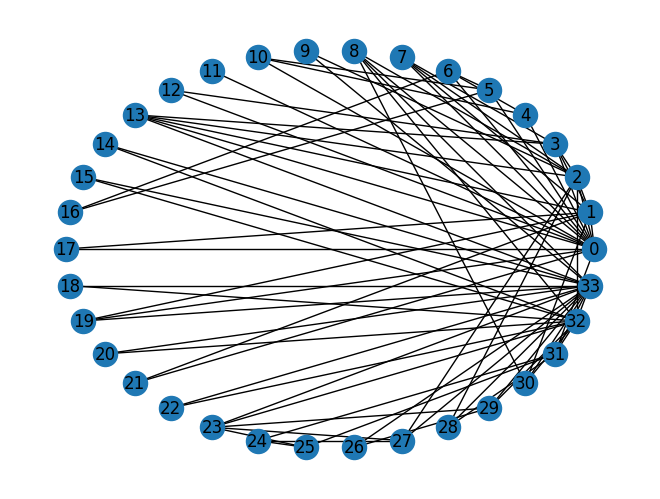

In [ ]:
karate = nx.karate_club_graph()
nx.draw_circular(karate, with_labels=True)

pos = nx.fruchterman_reingold_layout(karate)

particiones, dicionario = girvan_newman(karate)

	-- Comunidades de la mejor particion --
--------------------------------------------------------------------
1º Comunidad -> [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
2º Comunidad -> [2, 24, 25, 27, 28, 31]
3º Comunidad -> [4, 5, 6, 10, 16]
4º Comunidad -> [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30]
5º Comunidad -> [9]


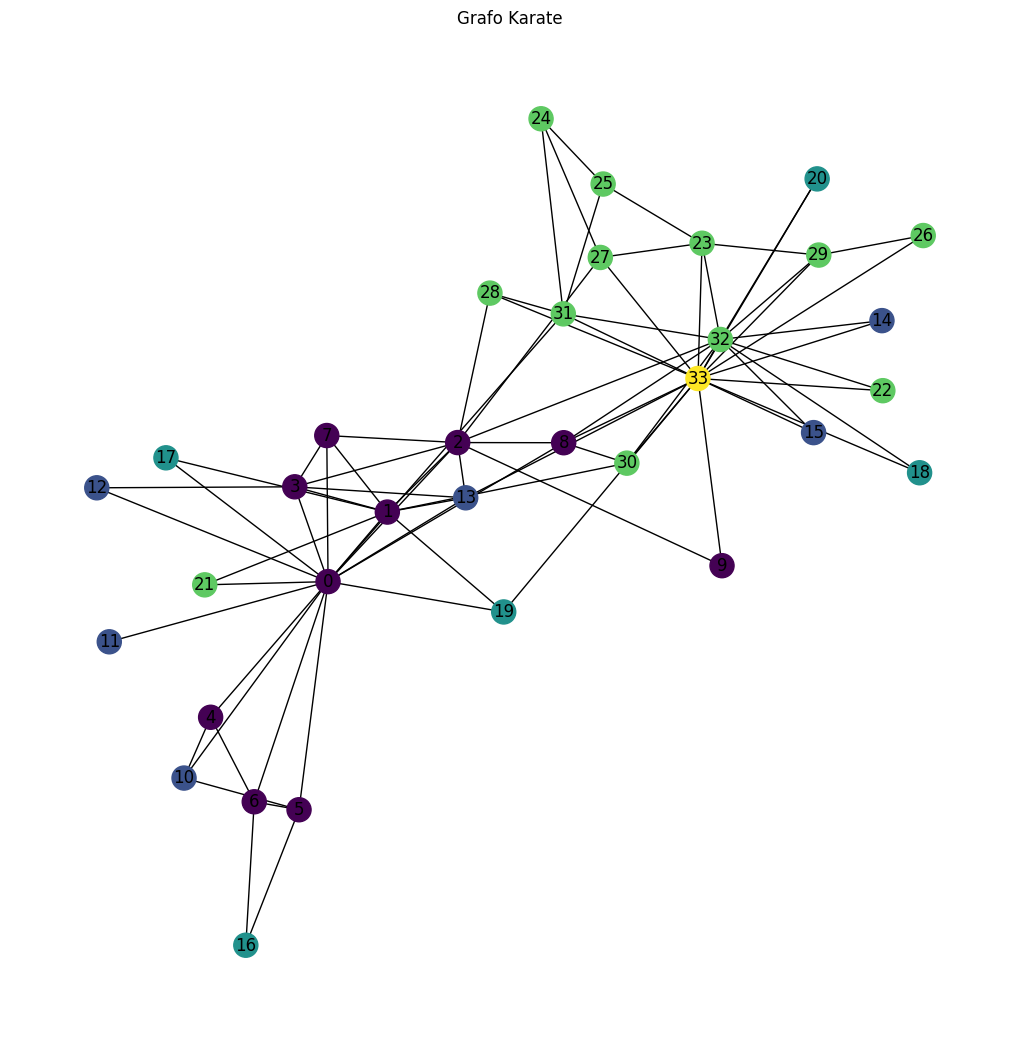

In [ ]:
mejor_particion = [list(particion) for particion in particiones]
print("\t-- Comunidades de la mejor particion --")
print('--------------------------------------------------------------------')
for i,p in enumerate(mejor_particion):
  print(f'{i+1}º Comunidad -> {p}')


imprimirGrafo(karate, coloresKarate(mejor_particion), 'Grafo Karate')

2 particiones -> modularidad:  0.3477
3 particiones -> modularidad:  0.3423
4 particiones -> modularidad:  0.3581
5 particiones -> modularidad:  0.3850
6 particiones -> modularidad:  0.3758
7 particiones -> modularidad:  0.3595
8 particiones -> modularidad:  0.3471
9 particiones -> modularidad:  0.3332
10 particiones -> modularidad:  0.3134
11 particiones -> modularidad:  0.3123
12 particiones -> modularidad:  0.3037
13 particiones -> modularidad:  0.2943
14 particiones -> modularidad:  0.2827
15 particiones -> modularidad:  0.2712
16 particiones -> modularidad:  0.2545
17 particiones -> modularidad:  0.2398
18 particiones -> modularidad:  0.2269
19 particiones -> modularidad:  0.2230
20 particiones -> modularidad:  0.2006
21 particiones -> modularidad:  0.1870
22 particiones -> modularidad:  0.1609
23 particiones -> modularidad:  0.1428
24 particiones -> modularidad:  0.1177
25 particiones -> modularidad:  0.1109
26 particiones -> modularidad:  0.1008
27 particiones -> modularidad:  0

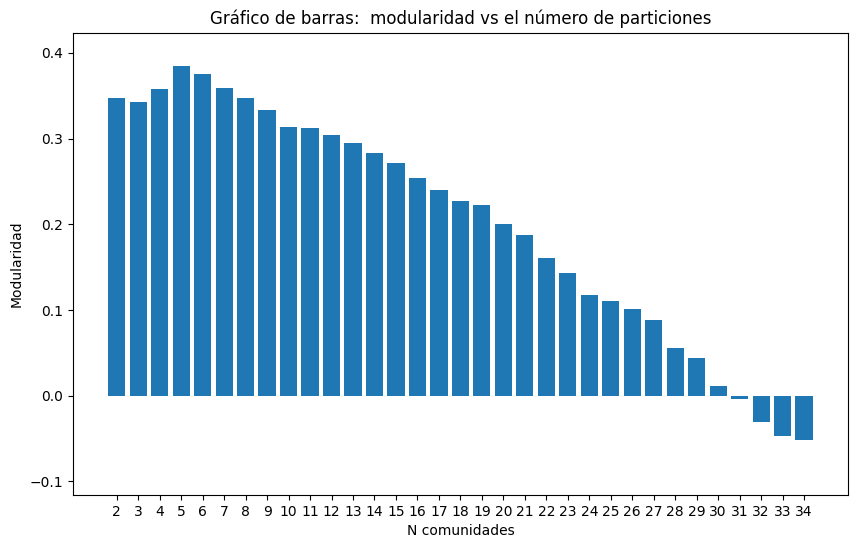

In [ ]:
for key, value in dicionario.items():
  print(f'{key} particiones -> modularidad: {value: .4f}')
  
imprimirGrafico(dicionario)